<div> 
    <div align="left"><img src="https://storage.cloudconvert.com/tasks/5a2c5801-7b30-4133-9872-96321b4fe4be/JO_LOGO.gif?AWSAccessKeyId=cloudconvert-production&Expires=1652973377&Signature=t2vIwDXpQAF8eS1DhRnmXHdL%2FuI%3D&response-content-disposition=attachment%3B%20filename%3D%22JO_LOGO.gif%22&response-content-type=image%2Fgif" width="450" height="450" align="left">
    </div>
    
</div>   
<div align="right"><h1><br><br><br><br>Project: Potential Talents</h1>
    </div>

<div> 
    <div align="left"><img src="https://miro.medium.com/max/1200/1*t_539YylKhbqfapSW019yg.jpeg" width="200" height="200" align="left">
    </div>
    <div>
        <p align="right"><h3><br><br><br><br>Project Overview </h3> </p>
    </div>
</div>

The problem statement for this project is to help the company in elemintaing the manual efforts invested in screening the candidates who are right fit for position they need to be hired. The project is carried out in two phases. 
<br>
#### Phase 1 : Rank the Candidates
The goal of the phase one is to automatically rank the candidates based on the search queries provided.
To achieve the goal of phase a machine learning model is created which will find the similarity in between the candidate title and search query provided. And based on the similarity score we will be ranking the candidates.<br>

In technical terms goal is to build a model for predicting how fit the candidate is for a particular role. Keywords to be used for search are Keywords: “Aspiring human resources” or “seeking human resources”. The output of the model indicates how fit the candidate is for the role? (numeric, probability between 0-1)<br>
<br>
#### Phase 2 : Re-Rank the Candidates based on user inputs
The goal of phase two is to let Human resources one the person using model provide priority to any individual who might be good for the role but was lanked lower by model. Then based on the inputs provided the model will re rank the candidates keeping the human inputs in consideration. 

<div> 
    <div align="left"><img src="https://www.computerhope.com/jargon/d/database.jpg" width="50" height="50" align="left">
    </div>
    <div >
        <p align="left"><h4><br>Data source Overview</h4> </p>
    </div>
</div>

The Data is proprietry of a talent sourcing and management company, who are focused on finding right fit of candidates for multiple technology companies.The dataset provide contains below features : <br>
 
i.  id : unique identifier for candidate (numeric)<br>

ii. job_title : job title for candidate (text)<br>

iii. location : geographical location for candidate (text)<br>

iv. connections: number of connections candidate has, 500+ means over 500 (text)<br>

Search Keywords provided by the company are “Aspiring human resources” or “seeking human resources”.

----------------------------------------------------------------------------------------------

<html>
    <div align="left"><img src="https://bvk70.com.ua/wp-content/plugins/flat-preloader/assets/images/color-style/settings.gif" width="50" height="50" align="left">
    </div>
     <div align="left">
         <h3><br>Initial Setup </h3>
    </div>
</html>

 - ###### Import all the required libraries

In [ ]:
# Import the required Libraries
import os
import random
import re
#import scipy
import math
import copy
import warnings
from PIL import Image
import matplotlib
import seaborn as sns
import pandas as pd
import numpy as np
from itertools import combinations
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec, KeyedVectors, FastText
from collections import Counter
import gensim
from gensim.models import KeyedVectors
import fasttext.util
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors
import tensorflow as tf
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import tensorflow_hub as hub
import tensorflow_text as text

 - ###### Set the random seed and load the data into data frame

In [459]:
# Set the file path
data_file_path=os.path.join(os.path.abspath('') , "Data","potentialTalents-AspiringHR-SeekingHR.csv")
# Set the random seed
random_seed=1212
# Set the random seed for python environment 
os.environ['PYTHONHASHSEED']=str(random_seed)
# Set numpy random seed
np.random.seed(random_seed)
# Set the random seed value
random.seed(random_seed)
# Setup List for storing the classfier, accuracy, f1 score and datatset type
eval_report=list()
# Filter out the warnings
warnings.filterwarnings('ignore')
# Load the data from csv file
pd_pt_data=pd.read_csv(data_file_path)
# view the data
pd_pt_data.head()

,id,job_title,location,connection,fit
0,1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN
1,2,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN
3,4,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN


 - ###### Define functions and Classes

In [572]:
# function 1
def preprocessing_of_text( lstSentences, sentences = True ):
    ''' Text preprocessing:
    Input: 
    This function takes two inputs lstSentences and sentences
    lstSentences: Is list of text which needs to be preprocessed
    sentences: Boolean flag if true returns output in cleaned sentences 
                else in word token format
    Output:
    This function returns a list containing either cleaned sentences or 
    cleaned sentences word tokens
    '''
    # Create a list of token of words 
    tokens1 = []
    # Tokenize the words and convert into lowercase
    tokens1 = [word_tokenize(str.lower(sentence)) for sentence in lstSentences]

    # Filter out the extra keywords like | , . ( ) & and digits
    rm1 = []
    for w in tokens1:
        sm = re.sub('[^A-Za-z]',' ', str(w))
        x = re.split("\s", sm)
        rm1.append(x)

    # Removing whitespaces    
    for sent in rm1:
        while '' in sent:
            sent.remove('')

    #  Lemmentize the words
    lemma1 = []

    # Create object of lemmantizer class
    wnl = WordNetLemmatizer()

    # Lemmentize the text
    for sent in rm1:
        tokens = [wnl.lemmatize(w) for w in sent]
        lemma1.append(tokens)

    # Removing Stopwords
    filter_words1 = []
    Stopwords = set(stopwords.words('english'))

    for sent in lemma1:
        tokens = [w for w in sent if ((w not in Stopwords) and (len(w) > 1))]
        filter_words1.append(tokens)

    # iterate throught the list and return the processed doc
    if (sentences):
        sentence_list = test = [' '.join(i) for i in filter_words1]
        return sentence_list
    else:
        # return the list of words for each sentence 
        return filter_words1


# function 2
def gen_vector_query(tokens):
    ''' Generate vectors for queries:
    Input: 
    This function takes word tokens as input
    Output:
    Returns the tf-idf
    '''
    Q = np.zeros(dict_len)
    
    counter = Counter(tokens)
    words_count = len(tokens)

    query_weights = {}
    
    for token in np.unique(tokens):
        
        tf = counter[token]/words_count
        df = word_freq_in_doc(token)
        idf = math.log((doc_len+1)/(df+1))

        try:
            ind = vocab_words.index(token)
            Q[ind] = tf*idf
        except:
            pass
    return Q


# function 3
def cosine_sim(item1 , item2 , multiple = False):
    ''' Calculate cosine similarity
    Input: 
    Takes vectors as inputs and calculates the cosine 
    simillarity between two items provided as output.
    '''
    if (multiple):
        co_sim =  item1.dot(item2)/((np.linalg.norm(item1, axis=1) * np.linalg.norm(item2))+ 0.001)
    else:
        co_sim = np.dot(item1, item2)/((np.linalg.norm(item1)*np.linalg.norm(item2)) + 0.001)
        
    return co_sim

# function 4
# Fetch the document frequency 
def word_freq_in_doc(word):
    # Initialize the counter 
    c = 0 
    
    # Check if the word exists 
    try:
        c = DF[word]
    except:
        pass
    # Return the count
    return c

# function 6
def cosine_similarity_doc(tf_idf, query):
    ''' Calculate cosine similarity for 
    all documents w.r.t a query
    Input: 
    tf_idf: tf-idf matrix for list of documents
    query : query against which cosine similarity
            needs to be calculated
    Output:
    Returns the cosine similarity score between the
    query and all documents provided.
    '''
    
    #  Preprocess and generate tokens for query
    query_token = word_tokenize(preprocessing_of_text(query)[0])
    
    # Calculate the  query tf-idf
    tf_idf_query = gen_vector_query(query_token)

    # similarity vis cosine 
    sim_cosine = []
    
    # Cosine similarity
    for x in tf_idf:
        sim_cosine.append(cosine_sim(tf_idf_query,x))
    
    # Calculate the cosine simmilarity for all 
    #cosine_sim = cosine_sim_multiple(tf_idf , tf_idf_query , multiple = True)
    
    # Return the similarity list
    return sim_cosine

# function 7
def get_tf_idf_vector(s,vocab_words, mdl, embed_size):
    ''' generate embedding vector for a sentence/documents
    Input: 
    s: sentence/documents for which embedding needs to be generated
    vocab_words : model vocabulary words
    mdl: Pre trained model
    embed_size: embedding size size
    Output:
    embedding for ther sentence/document based on the model given
    '''
     # Use the Average vector  or find similar word  and the try to use embedding ??
    return np.mean(np.array([mdl[w] if w in vocab_words else np.zeros(embed_size) for w in word_tokenize(s) ]), axis=0)

# function 8
def w2v_cosine_similarity(query , mdl, cleaned_sentences,embed_size=300, fasttextflag = False):
    
    ''' Word 2 vec cosine similarity calculation
    Input: 
      query: query against which similarity needs to be calculated
      mdl: Pre trained model 
      cleaned_sentences: Cleaned sentences list 
      embed_size : Embedding size of the model, default value is 300
      fasttextflag: Introduced to make function reusable for fasttext
                  model as well(True), default value is False
    Output:
    Cosine similarity score
    '''
    
    #  Preprocess query
    query_preprocess = preprocessing_of_text(query)[0]
    # similarity vis cosine 
    sim_cosine = []
    
    # Fetch the model vocab and check if its fasttext
    if (fasttextflag):
        vocab_words = mdl.get_words()
    else: 
        vocab_words = mdl.vocab.keys()
    
    # Cosine similarity wrt to all documents 
    for sent in cleaned_sentences:
        # Calculate the cosine similarity
        sim_cosine.append(cosine_sim(get_tf_idf_vector(query_preprocess, vocab_words, mdl,embed_size),\
                                     get_tf_idf_vector(sent, vocab_words, mdl,embed_size)))
   
    # Return the similarity list
    return sim_cosine

# function 9
def conversion_to_bert_input(preprocessor, encoder, lst_sentences ):
    ''' converts list of sentences into bert input format
    Input: 
      preprocessor: pretrained Bert preprocessor
      encoder: pretrained Bert encoder
    Output:
    returns the bert format inout for list of sentences 
    '''
    # Pre-process the data and encode using Bert preprocessor and encoder
    return [ normalization_embeds(encoder(preprocessor(tf.constant([sent])))["default"])  for sent in lst_sentences]

# function 10
def bert_similarity_score(lst_norm_sent, norm_query ):
    ''' calculates bert similarity score
    Input: 
      lst_norm_sent: list of normalised bert formatted
                      input documents
      norm_query: normalised bert formatted query       
    Output:
    returns the similarity scores between the 
    sentences/documents bert embeddings and query bert embedding
    '''
    # Bert similarity score
    return [ float(np.matmul(norm_query, np.transpose(nrm_sent))) for nrm_sent in lst_norm_sent ]

# function 11 
def normalization_embeds(embeds):
    ''' Normalize the bert embeddings
    Input: 
      embeds: input embedding   
    Output:
    returns normalised bert embeddings
    '''
    norms = np.linalg.norm(embeds, 2, axis=1, keepdims=True)
    return embeds/norms 

# function 12
def fetch_ft_embedding(ft_200_mdl,cleaned_sent_doc,embed_size=200):
    ''' 
    Generates the fasttext embeddings for a document list
    provided as input
    Input: 
      ft_200_mdl: Pre trained fasttext model
      cleaned_sent_doc: List of cleaned sentences list
      embed_size: Embeding size of the model, default is 200  
    Output:
    returns normalised bert embeddings
    '''
    
    # Fetch the fast text vectors for input 
    vocab_words = ft_200_mdl.get_words()

    #fastText  vector 
    fastText_embedding =  []
    
    # Loop in to fetch the embedding weights
    for sentence in cleaned_sent_doc:
        embedd = np.mean(np.array([ft_200_mdl[w] if w in vocab_words else np.zeros(embed_size) for w in word_tokenize(sentence) ]), axis=0)
        fastText_embedding.append(embedd)
    # Return 
    return(fastText_embedding)

# function 13 
def plot_learning( hist, metric):
    ''' 
    Function for plotting the learning 
    metric of the model for training
    Input: 
      hist: history of model training
      metric: Metric needs to be analyzed
              like loss
    Output:
    returns normalised bert embeddings
    '''
    
    plt.title(metric + " Learning plot")
    plt.plot(hist[metric], color='blue', label='train_' +metric)
    plt.plot(hist['val_' + metric], color='red', label='val_' + metric)
    plt.xlabel(xlabel="No Of Training Epochs")
    plt.ylabel(ylabel=metric)
    plt.legend(loc="upper right")
    plt.show()
    
# function 14
def generate_wrd_cld(str_values, shape, background_col='gray'):
    '''
    Generates word cloud for visualizing word
    frequency distribution in shape of a usa map
    pandas_df: Pandas data frame
    str_text_col: Name of the column containing text
    background_col: color of back ground, defualt gray
    shape: shape of image
    '''
    # Fetch words from the text
    text_wrd_cld = " ".join(item  for col in str_values for item in col.split())
    
    # Mask for word cloud
    cloud_mask = np.array(Image.open("Data/wordcloud_generator_.png"))
    # Generate the word cloud
    word_cloud = WordCloud(collocations=False,
                           background_color=background_col,
                           colormap=matplotlib.cm.flag,
                           mask=cloud_mask).generate(text_wrd_cld)
    # Plot the word cloud
    plt.figure(figsize=shape)
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    
# class 1
class Rank_Net( tf.keras.Model):
    ''' 
    Rank_Net customized class for re-ranking
    '''
    def __init__(self):
        super().__init__()
        self.model = tf.keras.Sequential()
        # Add the input layer
        self.model.add(tf.keras.layers.Input(shape=(200)))
        self.model.add(tf.keras.layers.Dense(400, activation='linear', name='input_layer_1'))
        self.model.add(tf.keras.layers.Dropout(rate=0.2, name='dropout_layer_1'))
        self.model.add(tf.keras.layers.Dense(800, activation=tf.nn.leaky_relu, name='input_layer_2'))
        self.model.add(tf.keras.layers.Dropout(rate=0.2, name='dropout_layer_2'))
        self.model.add(tf.keras.layers.Dense(200, activation=tf.nn.leaky_relu, name='input_layer_3'))
        self.model.add(tf.keras.layers.Dense(1, activation='sigmoid', name='output_layer'))

        
    def call(self, inputs):
        input1, input2 = inputs
        #model 1 
        s1 = self.model(input1)
        s2 = self.model(input2)
        out = tf.nn.sigmoid(s1-s2)
        return out
    
    def build_graph(self):
        X = [ tf.keras.layers.Input(shape=(200)), tf.keras.layers.Input(shape=(200))]
        return tf.keras.Model(inputs=X,outputs=self.call(X))
    
    def predict(self, input_):
        s = self.model(input_)
        return s
    

   

----------------------------------------------------------------------------------------------

<div> 
    <div align="left">
        <img src="https://miro.medium.com/max/1400/1*K_hLudh-eIaxicZ_CGkTnQ.jpeg" width="250" height="250"  align="left">
    </div>
    <div>
        <p align="right"><h3><br><br><br><br>Exploratory Data Analysis</h3></p>
    </div>
</div>

**Step 1.** Let's analyze the features individually first to understand their distributions.<br>
_i. Analyze the complete data_

In [461]:
print("\nData Types:")
print(pd_pt_data.dtypes)
print("\nTotal No Of Records:")
print(len(pd_pt_data) , " records")
print("\nLook for NA values in relevant columns:")
print( "Count of NA records in job title" , pd_pt_data['job_title'].isna().sum())
print( "Count of NA records in location" , pd_pt_data['location'].isna().sum())
print( "Count of NA records in connection" , pd_pt_data['connection'].isna().sum())


Data Types:
id              int64
job_title      object
location       object
connection     object
fit           float64
dtype: object

Total No Of Records:
104  records

Look for NA values in relevant columns:
Count of NA records in job title 0
Count of NA records in location 0
Count of NA records in connection 0


In [462]:
# Drop the data columns not required
pd_pt_data.drop(columns=['fit'], inplace=True)
pd_pt_data.head(5)

,id,job_title,location,connection
0,1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85
1,2,Native English Teacher at EPIK (English Progra...,Kanada,500+
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44
3,4,People Development Coordinator at Ryan,"Denton, Texas",500+
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+


_ii. Analyzing the location feature_
<br>
Let's understand the distribution of candidates by location

In [463]:
# Cleaned location
cleaned_location_doc = preprocessing_of_text(pd_pt_data['location'].values)
pd_pt_data['location'] = cleaned_location_doc

# Top 10 locations
summary_by_loc = pd_pt_data.pivot_table(aggfunc='count', 
                       index='location', 
                       values='job_title').sort_values(by='job_title',
                                                       ascending=False)
# Add location column
summary_by_loc['Locations'] = summary_by_loc.index.values

# Fetch unique job locations
print( "Unique job locations : ",np.unique(len(summary_by_loc.index.values))[0])

Unique job locations :  41


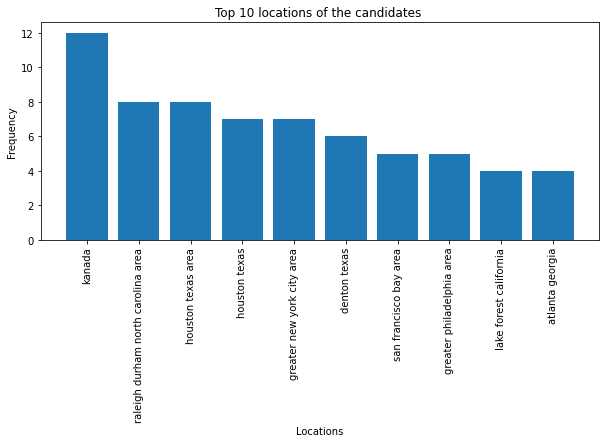

In [464]:
plt.figure(figsize=(10,4))
plt.bar( data=summary_by_loc.head(10), x='Locations', 
        height='job_title')
plt.xticks(rotation=90)
plt.title("Top 10 locations of the candidates ")
plt.xlabel("Locations")
plt.ylabel("Frequency")
plt.show()

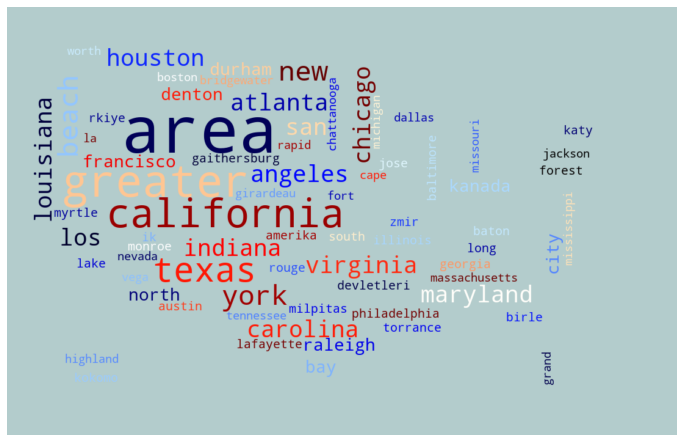

In [570]:
# Generate word cloud for job locations
generate_wrd_cld(summary_by_loc['Locations'].values, shape=(12,9), background_col="#b3cccc" )

From the word plot we can see the majority of job postings listed in the dataset belongs to California, Huston, New York, atlanta.

_iii. Analyzing the job title feature_
<br>
Let's understand the distribution of candidates by job title

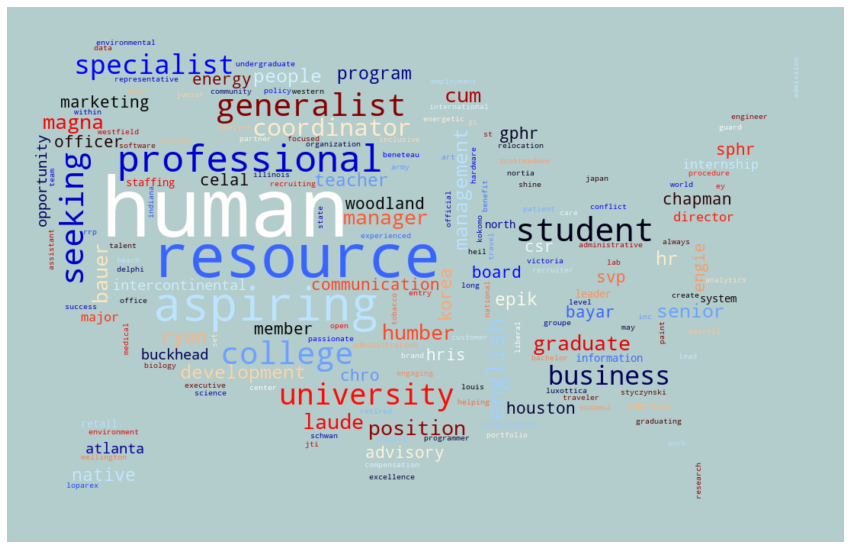

In [571]:
# Cleaned the job titile data
cleaned_sent_doc = preprocessing_of_text(pd_pt_data['job_title'].values)

# Generate word cloud for job titles
generate_wrd_cld(cleaned_sent_doc, shape=(15,10), background_col="#b3cccc" )

From the word cloud we can deduce that most of the job title have human, resource, professional as the most common words.

----------------------------------------------------------------------------------------------

<h3> Phase1 </h3>
<br>
Phase 1 will be implementation of machine learning algorithms to rank the job titles listed in the dataset w.r.t the query provided. The goal is to build a model which will return the similarity scores for all job titles. Below is the list of NLP techniques used <br>
<ol>
     a. tf-idf cosine similarity<br>
     b. Word2vec cosine similarity using pretrained model<br>
     c. Word2vec cosine similarity via Transfer learning<br>
     d. GloVe pre-trained model embeddings for similarity calculation<br>
     e. fastText pre-trained model embeddings for similarity calculation<br>
     f. Bert pre-trained model embeddings for similarity calculation<br>
</ol>
And the approach returning best result will be used as input for re-ranking.  

### **a. tf-idf cosine similarity**

**Step 1.** Preprocess the queries and job titles

In [574]:
# Show previously pre processed job titles
print("\n Five records from pre-processed job titles:")
print(cleaned_sent_doc[:5])
# preprocessing text for query 1
str_query1 = [ 'Aspiring human resources']
str_query1  = preprocessing_of_text(str_query1)
print("\n Pre-processed query 1:")
print(str_query1)
# preprocessing text for query 1
str_query2 = [ 'seeking human resources']
str_query2 = preprocessing_of_text(str_query2)
print("\n Pre-processed query 2:")
print(str_query2)


 Five records from pre-processed job titles:
['bauer college business graduate magna cum laude aspiring human resource professional', 'native english teacher epik english program korea', 'aspiring human resource professional', 'people development coordinator ryan', 'advisory board member celal bayar university']

 Pre-processed query 1:
['aspiring human resource']

 Pre-processed query 2:
['seeking human resource']


**Step 3.** Building vocabulary from job title text for tf-idf calculations 

In [576]:
# Calculate the data frequency for cleaned sentences 
DF ={}

# Loop in through the list of documente 
for i in range(len(cleaned_sent_doc)):

    # Calculate the freq
    for wd in word_tokenize(cleaned_sent_doc[i]):
        # If word found increament the counter
        try:
            DF[wd].add(i)
        except:
            DF[wd] = {i}

# Calcuate the word frequencies 
for i in DF:
    #Fetch the length 
    DF[i] = len(DF[i])

# Fetch the vocab words 
vocab_words = [  x for x in DF]

# Fetch the length of documents 
doc_len = len(cleaned_sent_doc)

# Fetch the length of dictionary 
dict_len = len(vocab_words)

In [578]:
print("10 most frequently used vocabulary words :")
# Mo
pd.DataFrame( {'Words' :  DF.keys(),
               'Frequency': DF.values() }).sort_values(by= ['Frequency'],
                                                       ascending=False).head(10)

10 most frequently used vocabulary words :


,Words,Frequency
8,human,61
9,resource,61
7,aspiring,35
10,professional,21
28,student,16
33,seeking,15
1,college,14
30,generalist,14
27,specialist,12
26,university,12


**Step 4.** Building TF-IDF matrix

In [580]:
# Document Counter
int_doc = 0

# TF IDF
tf_idf_doc = {}


# loop in for all documents 
for i in range(doc_len):
    # Get the tokens 
    lst_tokens = word_tokenize(cleaned_sent_doc[i])
    
    # get the count frequency for each word in document 
    dic_counter = Counter(lst_tokens)
    
    # get the word count for doc
    int_word_count_doc = len(lst_tokens)
    
    # develop the dict
    for token in np.unique(lst_tokens):
        
        # Fetch the term frequency
        tf = dic_counter[token]/int_word_count_doc
        
        # Fetch the document frequency 
        df = word_freq_in_doc(token)
        
        # Fetch the idf 
        idf = np.log((doc_len + 1)/(df + 1))
        
        # Add entry in tf_idf dict
        tf_idf_doc[int_doc , token] = tf * idf
    
    # Increment the doc counter
    int_doc +=1

**Step 5.** Convert the dict into vector Tf-IDF vector

In [581]:
# Document Vectorization - 0 matrix for all dict and documents
tf_idf = np.zeros((doc_len, dict_len))

# Loop in the dict object 
for i in tf_idf_doc:
    ind = vocab_words.index(i[1])
    tf_idf[i[0]][ind] = tf_idf_doc[i]

**Step 5.** Calculate cosine similarity w.r.t queries

In [582]:
# Calculate the cosine distances for query 1 - str_query1
cosine_sim_lst = cosine_similarity_doc(tf_idf, str_query1)
pd_pt_data['tf_idf_cosine_sim_query1'] = cosine_sim_lst

# Calculate the cosine distances for query 2 - str_query2
cosine_sim_lst = cosine_similarity_doc(tf_idf, str_query2)
pd_pt_data['tf_idf_cosine_sim_query2']= cosine_sim_lst

**Step 6.** Analyse top 20 ranked candidates job titles for both queries

In [605]:
print("Top 20 ranked candidates job title for " , str_query1 )
pd_pt_data.sort_values(by=['tf_idf_cosine_sim_query1'],
                       ascending=False).head(20)[['id', 
                                                  'job_title', 
                                                  'tf_idf_cosine_sim_query1']]

Top 20 ranked candidates job title for  ['aspiring human resource']


,id,job_title,tf_idf_cosine_sim_query1
2,3,Aspiring Human Resources Professional,0.637814
45,46,Aspiring Human Resources Professional,0.637814
32,33,Aspiring Human Resources Professional,0.637814
16,17,Aspiring Human Resources Professional,0.637814
96,97,Aspiring Human Resources Professional,0.637814
20,21,Aspiring Human Resources Professional,0.637814
57,58,Aspiring Human Resources Professional,0.637814
23,24,Aspiring Human Resources Specialist,0.527609
48,49,Aspiring Human Resources Specialist,0.527609
5,6,Aspiring Human Resources Specialist,0.527609


In [606]:
print(" Top 20 ranked candidates job title for " , str_query2 )
pd_pt_data.sort_values(by=['tf_idf_cosine_sim_query2'],
                       ascending=False).head(20)[['id', 
                                                  'job_title', 
                                                  'tf_idf_cosine_sim_query2']]

 Top 20 ranked candidates job title for  ['seeking human resource']


,id,job_title,tf_idf_cosine_sim_query2
98,99,Seeking Human Resources Position,0.616834
27,28,Seeking Human Resources Opportunities,0.552637
29,30,Seeking Human Resources Opportunities,0.552637
72,73,"Aspiring Human Resources Manager, seeking inte...",0.465869
9,10,Seeking Human Resources HRIS and Generalist Po...,0.414214
61,62,Seeking Human Resources HRIS and Generalist Po...,0.414214
52,53,Seeking Human Resources HRIS and Generalist Po...,0.414214
39,40,Seeking Human Resources HRIS and Generalist Po...,0.414214
28,29,Aspiring Human Resources Management student se...,0.391801
26,27,Aspiring Human Resources Management student se...,0.391801


From the results we can see that we are able to get relevant results from tf-idf matrix approach but the similarity score definitely needs improving.<br>


### **b. Word2vec cosine similarity using pretrained model**<br>
Embeddings of GoogleNews-vectors-negative300.bin Word2vec pre-trained model are used for calculating similarity with query.
<br><br>
**Step 1.** Load GoogleNews-vectors-negative300.bin Word2vec pre-trained model 

In [594]:
# Set the pre trained model file path
mdl_name = "GoogleNews-vectors-negative300.bin"
mdl_file_path = os.path.join(os.path.abspath('') , "PreTrainedModel",mdl_name)

# Load the pre trained model
mdl_pre_trained = KeyedVectors.load_word2vec_format(mdl_file_path, binary = True)

**Step 2.** Calculate the cosine similarities w.r.t queries

In [595]:
# Calculate the cosine distances for query 1 - str_query1
cosine_w2v_query = w2v_cosine_similarity(str_query1, mdl_pre_trained, cleaned_sent_doc)
pd_pt_data['w2v_cosine_sim_query1'] = cosine_w2v_query

# Calculate the cosine distances for query 2 - str_query2
cosine_w2v_query = w2v_cosine_similarity(str_query2, mdl_pre_trained, cleaned_sent_doc)
pd_pt_data['w2v_cosine_sim_query2']= cosine_sim_lst

**Step 3.** Analyse the top 20 ranked candidates job title for both queries

In [607]:
print(" Top 20 ranked candidates job title for " , str_query1 )
pd_pt_data.sort_values(by=['w2v_cosine_sim_query1'],
                       ascending=False).head(20)[['id', 
                                                  'job_title', 
                                                  'w2v_cosine_sim_query1']]

 Top 20 ranked candidates job title for  ['aspiring human resource']


,id,job_title,w2v_cosine_sim_query1
96,97,Aspiring Human Resources Professional,0.950077
2,3,Aspiring Human Resources Professional,0.950077
32,33,Aspiring Human Resources Professional,0.950077
45,46,Aspiring Human Resources Professional,0.950077
20,21,Aspiring Human Resources Professional,0.950077
16,17,Aspiring Human Resources Professional,0.950077
57,58,Aspiring Human Resources Professional,0.950077
48,49,Aspiring Human Resources Specialist,0.911938
23,24,Aspiring Human Resources Specialist,0.911938
35,36,Aspiring Human Resources Specialist,0.911938


In [608]:
print("Top 20 ranked candidates job title for  " , str_query2 )
pd_pt_data.sort_values(by=['w2v_cosine_sim_query2'],
                       ascending=False).head(20)[['id', 
                                                  'job_title', 
                                                  'w2v_cosine_sim_query2']]

Top 20 ranked candidates job title for   ['seeking human resource']


,id,job_title,w2v_cosine_sim_query2
98,99,Seeking Human Resources Position,0.616834
27,28,Seeking Human Resources Opportunities,0.552637
29,30,Seeking Human Resources Opportunities,0.552637
72,73,"Aspiring Human Resources Manager, seeking inte...",0.465869
9,10,Seeking Human Resources HRIS and Generalist Po...,0.414214
61,62,Seeking Human Resources HRIS and Generalist Po...,0.414214
52,53,Seeking Human Resources HRIS and Generalist Po...,0.414214
39,40,Seeking Human Resources HRIS and Generalist Po...,0.414214
28,29,Aspiring Human Resources Management student se...,0.391801
26,27,Aspiring Human Resources Management student se...,0.391801


In this implementation the result of query 1 and query 2 looks pretty much simillar. <br>
after observing it closely it feels like the query results are not close, especially for query 2. Let's try a different Word2Vec pretrained model and perform transfer learning and see if there is any improvement in results. <br>

### **c. Word2vec cosine similarity via Transfer learning**

**Step 1.** Create a Word2Vec base model

In [600]:
# Create your base model 
word2Vec_base_model = Word2Vec( size=300, window=5, min_count=1, workers=2)

# Create list of word tokens
cleaned_word_tokens = [word_tokenize(cleaned_sent_doc[i]) for i in range(len(cleaned_sent_doc))]

# Build vocab
word2Vec_base_model.build_vocab(cleaned_word_tokens)

**Step 2.** Update the training weights and train the model

In [602]:
# update the weights during training using pre-trained model
word2Vec_base_model.intersect_word2vec_format(mdl_file_path, lockf=1, binary=True )

# continue training with you own data
word2Vec_base_model.train(cleaned_word_tokens, 
                          total_examples=len(cleaned_sent_doc), 
                          epochs=300)

(86261, 192300)

**Step 3.** Calculate the cosine similarity score w.r.t queries

In [603]:
# Calculate the cosine distances for query 1 - str_query1
cosine_w2v_query = w2v_cosine_similarity(str_query1, mdl_pre_trained, cleaned_sent_doc)
pd_pt_data['w2v_tf_cosine_sim_query1'] = cosine_w2v_query

# Calculate the cosine distances for query 2 - str_query2
cosine_w2v_query = w2v_cosine_similarity(str_query2, mdl_pre_trained, cleaned_sent_doc)
pd_pt_data['w2v_tf_cosine_sim_query2']= cosine_sim_lst

**Step 4.** Analyse top 20 ranked candidates job titles for queries 

In [609]:
print("Top 20 ranked candidates job title for  " , str_query1 )
pd_pt_data.sort_values(by=['w2v_tf_cosine_sim_query1'],
                       ascending=False).head(20)[['id', 
                                                  'job_title', 
                                                  'w2v_tf_cosine_sim_query1']]

Top 20 ranked candidates job title for   ['aspiring human resource']


,id,job_title,w2v_tf_cosine_sim_query1
96,97,Aspiring Human Resources Professional,0.950077
2,3,Aspiring Human Resources Professional,0.950077
32,33,Aspiring Human Resources Professional,0.950077
45,46,Aspiring Human Resources Professional,0.950077
20,21,Aspiring Human Resources Professional,0.950077
16,17,Aspiring Human Resources Professional,0.950077
57,58,Aspiring Human Resources Professional,0.950077
48,49,Aspiring Human Resources Specialist,0.911938
23,24,Aspiring Human Resources Specialist,0.911938
35,36,Aspiring Human Resources Specialist,0.911938


In [610]:
print("Top 20 ranked candidates job title for  " , str_query2 )
pd_pt_data.sort_values(by=['w2v_tf_cosine_sim_query2'],
                       ascending=False).head(20)[['id', 
                                                  'job_title', 
                                                  'w2v_tf_cosine_sim_query2']]

Top 20 ranked candidates job title for   ['seeking human resource']


,id,job_title,w2v_tf_cosine_sim_query2
98,99,Seeking Human Resources Position,0.616834
27,28,Seeking Human Resources Opportunities,0.552637
29,30,Seeking Human Resources Opportunities,0.552637
72,73,"Aspiring Human Resources Manager, seeking inte...",0.465869
9,10,Seeking Human Resources HRIS and Generalist Po...,0.414214
61,62,Seeking Human Resources HRIS and Generalist Po...,0.414214
52,53,Seeking Human Resources HRIS and Generalist Po...,0.414214
39,40,Seeking Human Resources HRIS and Generalist Po...,0.414214
28,29,Aspiring Human Resources Management student se...,0.391801
26,27,Aspiring Human Resources Management student se...,0.391801


Despite of transfer learning there isn't much difference in the results. Ranking scores for query 2 have worsened. Let's try with gloVe model.<br>

### d. GloVe pre-trained model embeddings for similarity calculation

**Step 1:** Convert GloVe pre-trained embeddings into Word2vec embeddings

In [612]:
#convert glove file into word2vec
glove2word2vec( "PreTrainedModel/glove.6B.200d.txt", "PreTrainedModel/GloVe_Pretrained.word2vec")

# Load the model
Glv_w2v_model = KeyedVectors.load_word2vec_format("PreTrainedModel/GloVe_Pretrained.word2vec")
, binary=False)

'binary=False)'

**Step 2.** Calculate the cosine similarity score w.r.t queries

In [614]:
# Calculate the cosine distances for query 1 - str_query1
cosine_Glv_query = w2v_cosine_similarity(str_query1, Glv_w2v_model, cleaned_sent_doc,embed_size=200)
pd_pt_data['glv_cosine_sim_query1'] = cosine_w2v_query

# Calculate the cosine distances for query 2 - str_query2
cosine_w2v_query = w2v_cosine_similarity(str_query2, Glv_w2v_model, cleaned_sent_doc,embed_size=200)
pd_pt_data['glv_cosine_sim_query2']= cosine_sim_lst

**Step 3.** Analyse top 20 ranked candidates job titles for queries

In [615]:
print("Top 20 ranked candidates job title for  " , str_query1 )
pd_pt_data.sort_values(by=['glv_cosine_sim_query1'],
                       ascending=False).head(20)[['id', 
                                                  'job_title', 
                                                  'glv_cosine_sim_query1']]

Top 20 ranked candidates job title for   ['aspiring human resource']


,id,job_title,glv_cosine_sim_query1
98,99,Seeking Human Resources Position,0.918367
29,30,Seeking Human Resources Opportunities,0.904160
27,28,Seeking Human Resources Opportunities,0.904160
72,73,"Aspiring Human Resources Manager, seeking inte...",0.842256
39,40,Seeking Human Resources HRIS and Generalist Po...,0.830342
61,62,Seeking Human Resources HRIS and Generalist Po...,0.830342
9,10,Seeking Human Resources HRIS and Generalist Po...,0.830342
52,53,Seeking Human Resources HRIS and Generalist Po...,0.830342
73,74,Human Resources Professional,0.799028
67,68,Human Resources Specialist at Luxottica,0.770568


In [617]:
print("Top 20 ranked candidates job title for  " , str_query2 )
pd_pt_data.sort_values(by=['glv_cosine_sim_query2'],
                       ascending=False).head(20)[['id', 
                                                  'job_title', 
                                                  'glv_cosine_sim_query2']]

Top 20 ranked candidates job title for   ['seeking human resource']


,id,job_title,glv_cosine_sim_query2
98,99,Seeking Human Resources Position,0.616834
27,28,Seeking Human Resources Opportunities,0.552637
29,30,Seeking Human Resources Opportunities,0.552637
72,73,"Aspiring Human Resources Manager, seeking inte...",0.465869
9,10,Seeking Human Resources HRIS and Generalist Po...,0.414214
61,62,Seeking Human Resources HRIS and Generalist Po...,0.414214
52,53,Seeking Human Resources HRIS and Generalist Po...,0.414214
39,40,Seeking Human Resources HRIS and Generalist Po...,0.414214
28,29,Aspiring Human Resources Management student se...,0.391801
26,27,Aspiring Human Resources Management student se...,0.391801


From ranking recieved the similarity scores dosen't seem to be good, and  scores for query 2 have worsened.<br>
### e. fastText pre-trained model embeddings for similarity calculation

**Step 1:** Load the fastText embeddings

In [618]:
# Check if the reduce model exists, if not reduce the size
if os.path.exists('PreTrainedModel/cc.en.200.bin'):
    print('Reduced model exists!!')
    # Load the reduced model 
    ft_200_mdl = fasttext.load_model('PreTrainedModel/cc.en.200.bin')
else:
    # Load original model and reduce it
    ft_300_mdl = fasttext.load_model('PreTrainedModel/cc.en.300.bin')
    ft_200_mdl = fasttext.util.reduce_model(ft_300_mdl, 200)
    ft_200_mdl.save_model('PreTrainedModel/cc.en.200.bin')

Reduced model exists!!


**Step 2.** Calculate the cosine similarity score w.r.t queries

In [621]:
# Calculate the cosine distances for query 1 - str_query1
cosine_fsttxt_query = w2v_cosine_similarity(str_query1, ft_200_mdl, cleaned_sent_doc,
                                            embed_size=200, fasttextflag = True)
pd_pt_data['fstext_cosine_sim_query1'] = cosine_fsttxt_query

# Calculate the cosine distances for query 2 - str_query2
cosine_fsttxt_query = w2v_cosine_similarity(str_query2, ft_200_mdl, cleaned_sent_doc,
                                            embed_size=200, fasttextflag = True)
pd_pt_data['fstext_cosine_sim_query2']= cosine_fsttxt_query

**Step 3.** Analyse top 20 ranked candidates job titles for queries

In [622]:
print("Top 20 ranked candidates job title for  " , str_query1 )
pd_pt_data.sort_values(by=['fstext_cosine_sim_query1'],
                       ascending=False).head(20)[['id', 
                                                  'job_title', 
                                                  'fstext_cosine_sim_query1']]

Top 20 ranked candidates job title for   ['aspiring human resource']


,id,job_title,fstext_cosine_sim_query1
20,21,Aspiring Human Resources Professional,0.982012
96,97,Aspiring Human Resources Professional,0.982012
32,33,Aspiring Human Resources Professional,0.982012
57,58,Aspiring Human Resources Professional,0.982012
16,17,Aspiring Human Resources Professional,0.982012
45,46,Aspiring Human Resources Professional,0.982012
2,3,Aspiring Human Resources Professional,0.982012
23,24,Aspiring Human Resources Specialist,0.969659
35,36,Aspiring Human Resources Specialist,0.969659
5,6,Aspiring Human Resources Specialist,0.969659


In [623]:
print("Top 20 ranked candidates job title for  " , str_query1 )
pd_pt_data.sort_values(by=['fstext_cosine_sim_query2'],
                       ascending=False).head(20)[['id', 
                                                  'job_title', 
                                                  'fstext_cosine_sim_query2']]

Top 20 ranked candidates job title for   ['aspiring human resource']


,id,job_title,fstext_cosine_sim_query2
27,28,Seeking Human Resources Opportunities,0.976236
29,30,Seeking Human Resources Opportunities,0.976236
98,99,Seeking Human Resources Position,0.963665
72,73,"Aspiring Human Resources Manager, seeking inte...",0.933336
73,74,Human Resources Professional,0.920116
67,68,Human Resources Specialist at Luxottica,0.908187
100,101,Human Resources Generalist at Loparex,0.891127
77,78,Human Resources Generalist at Schwan's,0.891127
59,60,Aspiring Human Resources Specialist,0.890546
48,49,Aspiring Human Resources Specialist,0.890546


Analysing the top ranked queries fastText approach seems to work better as compared to previous approaches.<br>

### f. Bert pre-trained model embeddings for similarity calculation

**Step 1.** Load the pre-trained bert preprocessor and encoder 

In [625]:
# Load preprocessor and encoder - test using USE-CMLM-MULTILINGUAL
preprocessor = hub.KerasLayer("PreTrainedModel/universal-sentence-encoder-cmlm_multilingual-preprocess_2/")
encoder = hub.KerasLayer("PreTrainedModel/universal-sentence-encoder-cmlm_multilingual-base_1/")

**Step 2.** Prepare input in format required by bert

In [206]:
# Generate the normalized encoded list for all word doc
lst_norm_encoded = conversion_to_bert_input(preprocessor, encoder, cleaned_sent_doc)

# get the norm encoded value for query 1 and 2
nom_encoded_query_1 = conversion_to_bert_input(preprocessor, encoder, str_query1)
nom_encoded_query_2 = conversion_to_bert_input(preprocessor, encoder, str_query2)

**Step 3.** Calculate the cosine similarity score w.r.t queries

In [626]:
# Calculate the similarity of query 1  w.r.t all documents 
bert_similarity_query1 = bert_similarity_score(lst_norm_encoded,nom_encoded_query_1)
pd_pt_data['bert_sim_query1'] = bert_similarity_query1

# Calculate the similarity of query 2  w.r.t all documents 
bert_similarity_query2 = bert_similarity_score(lst_norm_encoded,nom_encoded_query_2)
pd_pt_data['bert_sim_query2']= bert_similarity_query2

**Step 4.** Analyse top 20 ranked candidates job titles for queries

In [627]:
print("Top 20 ranked candidates job title for  " , str_query1 )
pd_pt_data.sort_values(by=['bert_sim_query1'],
                       ascending=False).head(20)[['id', 
                                                  'job_title', 
                                                  'bert_sim_query1']]

Top 20 ranked candidates job title for   ['aspiring human resource']


,id,job_title,bert_sim_query1
48,49,Aspiring Human Resources Specialist,0.969538
35,36,Aspiring Human Resources Specialist,0.969538
5,6,Aspiring Human Resources Specialist,0.969538
23,24,Aspiring Human Resources Specialist,0.969538
59,60,Aspiring Human Resources Specialist,0.969538
96,97,Aspiring Human Resources Professional,0.967677
45,46,Aspiring Human Resources Professional,0.967677
20,21,Aspiring Human Resources Professional,0.967677
16,17,Aspiring Human Resources Professional,0.967677
32,33,Aspiring Human Resources Professional,0.967677


In [628]:
print("Top 20 ranked candidates job title for  " , str_query2 )
pd_pt_data.sort_values(by=['bert_sim_query2'],
                       ascending=False).head(20)[['id', 
                                                  'job_title', 
                                                  'bert_sim_query2']]

Top 20 ranked candidates job title for   ['seeking human resource']


,id,job_title,bert_sim_query2
27,28,Seeking Human Resources Opportunities,0.965221
29,30,Seeking Human Resources Opportunities,0.965221
98,99,Seeking Human Resources Position,0.953032
73,74,Human Resources Professional,0.933216
48,49,Aspiring Human Resources Specialist,0.929507
5,6,Aspiring Human Resources Specialist,0.929506
23,24,Aspiring Human Resources Specialist,0.929506
35,36,Aspiring Human Resources Specialist,0.929506
59,60,Aspiring Human Resources Specialist,0.929506
32,33,Aspiring Human Resources Professional,0.918224


Analyzing the results returned by bert closely, we can say that fastText is the best model as the similarity score are similar to 1.

<h3> Phase 2 </h3>
<br>
Since we have identified the best way to rank our candidates. We will be ustilising fastText model and allow end user to re-rank the data to fine tune the ranking system by re-ranking. <br>

**Step 1.** Starring the canditates.<br>
The id's for which simililarity scores should be higher than assigned by fastText model will be updated using input by user.<br>

 - Copy the similarity scores for both queries

In [634]:
pd_pt_data['fit_1'] = pd_pt_data['fstext_cosine_sim_query1']
pd_pt_data['fit_2'] = pd_pt_data['fstext_cosine_sim_query2']

 - Add star to Candidates, for which the score returned by fasttext seems incorrect
     - id for query 1 : [1,3,6,14,15,17,19,21,22,24,25]
     - id for query 2 : [1,8,10,14,15,19,26]

In [636]:
star_candidates_all = []
# star candidates 
for item in [1,2]:
    # Append the candidates 
    pd_pt_data['fit_'+ str(item)] =  pd_pt_data['fstext_cosine_sim_query'+str(item)] 
    star_candidate = input("Do you want to start any candidate for query "+ str(item) + "?")
    if star_candidate.lower() == "yes":
        starred = []
        starred = [ int(idx.strip()) for idx in input("Add all candidate id's separated by comma !! ").split(",")]
        for idx in starred:
            pd_pt_data.loc[pd_pt_data['id'] == idx, 'fit_'+ str(item)] = 1
        print('ID updated for query for '+'fit_'+ str(item) , " : ", starred)
        # Add all candidates for query
        star_candidates_all.append(starred)
    else:
        print("no update required !!")  

Do you want to start any candidate for query 1?yes
Add all candidate id's separated by comma !! 1,3,6,14,15,17,19,21,22,24,25
ID updated for query for fit_1  :  [1, 3, 6, 14, 15, 17, 19, 21, 22, 24, 25]
Do you want to start any candidate for query 2?yes
Add all candidate id's separated by comma !! 1,8,10,14,15,19,26
ID updated for query for fit_2  :  [1, 8, 10, 14, 15, 19, 26]


In [637]:
pd_pt_data[['id', 'job_title',
            'fstext_cosine_sim_query1', 
            'fstext_cosine_sim_query2', 'fit_1', 'fit_2']].head(20)

,id,job_title,fstext_cosine_sim_query1,fstext_cosine_sim_query2,fit_1,fit_2
0,1,2019 C.T. Bauer College of Business Graduate (...,0.492753,0.435376,1.000000,1.000000
1,2,Native English Teacher at EPIK (English Progra...,0.374562,0.309251,0.374562,0.309251
2,3,Aspiring Human Resources Professional,0.982012,0.886913,1.000000,0.886913
3,4,People Development Coordinator at Ryan,0.328100,0.299481,0.328100,0.299481
4,5,Advisory Board Member at Celal Bayar University,0.333959,0.340526,0.333959,0.340526
5,6,Aspiring Human Resources Specialist,0.969659,0.890546,1.000000,0.890546
6,7,Student at Humber College and Aspiring Human R...,0.811995,0.710245,0.811995,0.710245
7,8,HR Senior Specialist,0.248210,0.235487,0.248210,1.000000
8,9,Student at Humber College and Aspiring Human R...,0.811995,0.710245,0.811995,0.710245
9,10,Seeking Human Resources HRIS and Generalist Po...,0.697938,0.730645,0.697938,1.000000


**Step 2.** Generate fastText embeddings<br>
Creating fastText embeddings for Input document and queries.

In [659]:
# Fetch the embedding weights for document
fastText_embedding_doc = fetch_ft_embedding(ft_200_mdl,cleaned_sent_doc,embed_size=200)

# Fetch the embedding weights for query1
fastText_embedding_query1 = fetch_ft_embedding(ft_200_mdl,str_query1,embed_size=200)

# Fetch the embedding weights for query2
fastText_embedding_query2 = fetch_ft_embedding(ft_200_mdl,str_query2,embed_size=200)

# add the fastext embedding arrays
pd_pt_data['EmbeddingArrays'] = pd.Series(fastText_embedding_doc)

**Step 3.** Visualize the RankNet NN designed

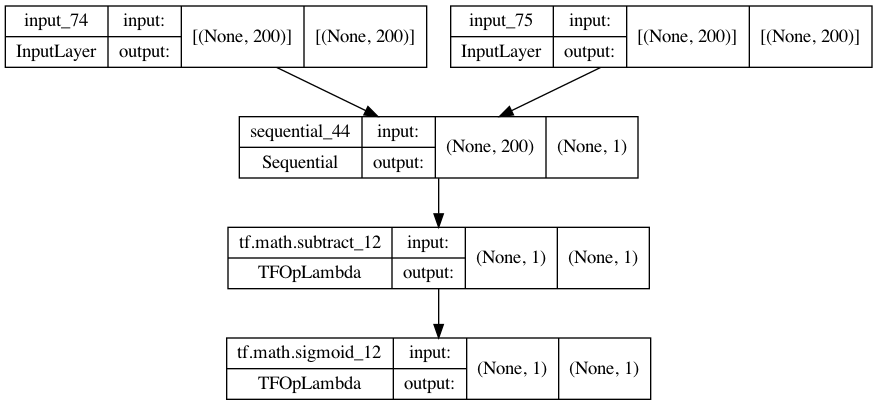

In [638]:
# visualize model architecture
tf.keras.utils.plot_model(Rank_Net().build_graph(), show_shapes=True)

**Step 4.** Preparing input for custom RankNet NN for Query 1<br>
RankNet is a pairwise LTR algorithm, which takes a pair as input and the output is retireved by logic 
<ol>
     i. if OutPut_1 == OutPut_2, then result is 0.5<br>
     ii. if OutPut_1 > OutPut_2, then result is 1.0<br>
     iii. else result is 0.0<br>
</ol>

- Generate random sample for input pair using sample method with replacement

In [660]:
sample_size = 125
# fetch the random input rows for input
random_row_1 = pd_pt_data.sample(n=sample_size, replace=True)
random_row_2 = pd_pt_data.sample(n=sample_size, replace=True)

X_1 = random_row_1['EmbeddingArrays'].values
X_2 = random_row_2['EmbeddingArrays'].values
Y_1 = random_row_1['fit_1'].values
Y_2 = random_row_2['fit_1'].values

 - From random rows selected generate combinations from index

In [643]:
# Generate combinations
lst_combinations = list(combinations(range(sample_size), 2))
sample_pair = int(len(lst_combinations)* 0.70)

 - From index combinations generated randomly select 70% of the combinations

In [644]:
#select samples randomly
random_pairs = [ random.randrange(len(lst_combinations)) for i in range(sample_pair)]

- Using index of randomly selected lst_combinations index, generate input and output in format required by RankNet NN

In [645]:
# Let's create empty lists for storing pairs
X_i = []
X_j = []
output_ij = []
pair_id = []

# step 1 generate random pairs of documents 
for idx in range(0,sample_pair):
    # Store the pair Id's
    pair_values = lst_combinations[random_pairs[idx] ]
    pair_id.append(pair_values)

    # fetch the input indexes
    i, j = pair_values

    # append in Xi and Xj
    X_i.append(X_1[i])
    X_j.append(X_2[j])

    # Check the scores 
    if Y_1[i] == Y_2[j]:
        _result_ij = 0.5
    elif Y_1[i] > Y_2[j]:
        _result_ij = 1.0
    else:
        _result_ij = 0.0

    output_ij.append(_result_ij)

 - Generate train and validation input and output list developed in previous step

In [646]:
# Convert the list into numpy arrays
X_i = np.array(X_i)
X_j = np.array(X_j)
output_ij = np.array(output_ij)
pair_id = np.array(pair_id)

# Perform Test Train split to get validation data 
xi_train, xi_val, xj_train, xj_val, pij_train, pij_val, pair_id_train, pair_id_val = train_test_split(
    X_i, X_j, output_ij, pair_id, test_size=0.2)

 - Train the Rank_Net() model for query 1

In [648]:
# Train the network
ranknet = Rank_Net()

# Define criteria for early stoping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20)

# compile the model
ranknet.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001), 
                loss='binary_crossentropy')

In [649]:
# Train the model
historyRank_Net = ranknet.fit([xi_train, xj_train], pij_train, epochs=2000, 
                      validation_data=([xi_val, xj_val], pij_val),
                              callbacks =[callback])

Epoch 1/2000
136/136 [==============================] - 3s 12ms/step - loss: 0.6920 - val_loss: 0.6919
Epoch 2/2000
136/136 [==============================] - 1s 10ms/step - loss: 0.6919 - val_loss: 0.6916
Epoch 3/2000
136/136 [==============================] - 1s 10ms/step - loss: 0.6916 - val_loss: 0.6914
Epoch 4/2000
136/136 [==============================] - 1s 10ms/step - loss: 0.6915 - val_loss: 0.6912
Epoch 5/2000
136/136 [==============================] - 1s 11ms/step - loss: 0.6913 - val_loss: 0.6910
Epoch 6/2000
136/136 [==============================] - 1s 11ms/step - loss: 0.6911 - val_loss: 0.6908
Epoch 7/2000
136/136 [==============================] - 2s 11ms/step - loss: 0.6911 - val_loss: 0.6906
Epoch 8/2000
136/136 [==============================] - 1s 11ms/step - loss: 0.6907 - val_loss: 0.6904
Epoch 9/2000
136/136 [==============================] - 1s 10ms/step - loss: 0.6907 - val_loss: 0.6902
Epoch 10/2000
136/136 [==============================] - 2s 11ms/step - l

136/136 [==============================] - 1s 9ms/step - loss: 0.6763 - val_loss: 0.6747
Epoch 81/2000
136/136 [==============================] - 1s 9ms/step - loss: 0.6760 - val_loss: 0.6744
Epoch 82/2000
136/136 [==============================] - 1s 10ms/step - loss: 0.6759 - val_loss: 0.6742
Epoch 83/2000
136/136 [==============================] - 1s 9ms/step - loss: 0.6756 - val_loss: 0.6739
Epoch 84/2000
136/136 [==============================] - 1s 8ms/step - loss: 0.6752 - val_loss: 0.6736
Epoch 85/2000
136/136 [==============================] - 1s 9ms/step - loss: 0.6750 - val_loss: 0.6734
Epoch 86/2000
136/136 [==============================] - 1s 10ms/step - loss: 0.6749 - val_loss: 0.6731
Epoch 87/2000
136/136 [==============================] - 2s 11ms/step - loss: 0.6745 - val_loss: 0.6728
Epoch 88/2000
136/136 [==============================] - 1s 9ms/step - loss: 0.6742 - val_loss: 0.6725
Epoch 89/2000
136/136 [==============================] - 1s 10ms/step - loss: 0.6740

Epoch 159/2000
136/136 [==============================] - 1s 9ms/step - loss: 0.6486 - val_loss: 0.6456
Epoch 160/2000
136/136 [==============================] - 1s 8ms/step - loss: 0.6480 - val_loss: 0.6451
Epoch 161/2000
136/136 [==============================] - 1s 8ms/step - loss: 0.6476 - val_loss: 0.6446
Epoch 162/2000
136/136 [==============================] - 1s 9ms/step - loss: 0.6469 - val_loss: 0.6442
Epoch 163/2000
136/136 [==============================] - 1s 9ms/step - loss: 0.6468 - val_loss: 0.6437
Epoch 164/2000
136/136 [==============================] - 1s 8ms/step - loss: 0.6463 - val_loss: 0.6432
Epoch 165/2000
136/136 [==============================] - 1s 9ms/step - loss: 0.6457 - val_loss: 0.6427
Epoch 166/2000
136/136 [==============================] - 1s 9ms/step - loss: 0.6452 - val_loss: 0.6422
Epoch 167/2000
136/136 [==============================] - 1s 9ms/step - loss: 0.6449 - val_loss: 0.6417
Epoch 168/2000
136/136 [==============================] - 1s 8ms

136/136 [==============================] - 1s 9ms/step - loss: 0.6076 - val_loss: 0.6045
Epoch 238/2000
136/136 [==============================] - 1s 8ms/step - loss: 0.6073 - val_loss: 0.6040
Epoch 239/2000
136/136 [==============================] - 1s 9ms/step - loss: 0.6065 - val_loss: 0.6035
Epoch 240/2000
136/136 [==============================] - 1s 8ms/step - loss: 0.6064 - val_loss: 0.6030
Epoch 241/2000
136/136 [==============================] - 1s 9ms/step - loss: 0.6060 - val_loss: 0.6025
Epoch 242/2000
136/136 [==============================] - 1s 8ms/step - loss: 0.6052 - val_loss: 0.6020
Epoch 243/2000
136/136 [==============================] - 1s 9ms/step - loss: 0.6046 - val_loss: 0.6015
Epoch 244/2000
136/136 [==============================] - 1s 9ms/step - loss: 0.6041 - val_loss: 0.6009
Epoch 245/2000
136/136 [==============================] - 1s 8ms/step - loss: 0.6040 - val_loss: 0.6004
Epoch 246/2000
136/136 [==============================] - 1s 8ms/step - loss: 0

136/136 [==============================] - 1s 9ms/step - loss: 0.5747 - val_loss: 0.5719
Epoch 316/2000
136/136 [==============================] - 1s 8ms/step - loss: 0.5741 - val_loss: 0.5716
Epoch 317/2000
136/136 [==============================] - 1s 10ms/step - loss: 0.5737 - val_loss: 0.5713
Epoch 318/2000
136/136 [==============================] - 1s 11ms/step - loss: 0.5734 - val_loss: 0.5710
Epoch 319/2000
136/136 [==============================] - 1s 11ms/step - loss: 0.5733 - val_loss: 0.5707
Epoch 320/2000
136/136 [==============================] - 1s 10ms/step - loss: 0.5734 - val_loss: 0.5704
Epoch 321/2000
136/136 [==============================] - 1s 9ms/step - loss: 0.5733 - val_loss: 0.5701
Epoch 322/2000
136/136 [==============================] - 2s 11ms/step - loss: 0.5727 - val_loss: 0.5698
Epoch 323/2000
136/136 [==============================] - 1s 10ms/step - loss: 0.5721 - val_loss: 0.5695
Epoch 324/2000
136/136 [==============================] - 2s 12ms/step - 

136/136 [==============================] - 2s 12ms/step - loss: 0.5563 - val_loss: 0.5546
Epoch 394/2000
136/136 [==============================] - 2s 11ms/step - loss: 0.5566 - val_loss: 0.5545
Epoch 395/2000
136/136 [==============================] - 2s 12ms/step - loss: 0.5563 - val_loss: 0.5543
Epoch 396/2000
136/136 [==============================] - 1s 10ms/step - loss: 0.5567 - val_loss: 0.5542
Epoch 397/2000
136/136 [==============================] - 1s 9ms/step - loss: 0.5564 - val_loss: 0.5540
Epoch 398/2000
136/136 [==============================] - 2s 11ms/step - loss: 0.5558 - val_loss: 0.5539
Epoch 399/2000
136/136 [==============================] - 2s 11ms/step - loss: 0.5560 - val_loss: 0.5537
Epoch 400/2000
136/136 [==============================] - 1s 10ms/step - loss: 0.5561 - val_loss: 0.5536
Epoch 401/2000
136/136 [==============================] - 1s 11ms/step - loss: 0.5556 - val_loss: 0.5534
Epoch 402/2000
136/136 [==============================] - 1s 8ms/step -

136/136 [==============================] - 1s 8ms/step - loss: 0.5483 - val_loss: 0.5466
Epoch 472/2000
136/136 [==============================] - 2s 13ms/step - loss: 0.5487 - val_loss: 0.5465
Epoch 473/2000
136/136 [==============================] - 1s 10ms/step - loss: 0.5483 - val_loss: 0.5464
Epoch 474/2000
136/136 [==============================] - 1s 10ms/step - loss: 0.5481 - val_loss: 0.5463
Epoch 475/2000
136/136 [==============================] - 2s 11ms/step - loss: 0.5480 - val_loss: 0.5463
Epoch 476/2000
136/136 [==============================] - 1s 9ms/step - loss: 0.5481 - val_loss: 0.5462
Epoch 477/2000
136/136 [==============================] - 1s 9ms/step - loss: 0.5482 - val_loss: 0.5461
Epoch 478/2000
136/136 [==============================] - 1s 9ms/step - loss: 0.5482 - val_loss: 0.5461
Epoch 479/2000
136/136 [==============================] - 1s 9ms/step - loss: 0.5471 - val_loss: 0.5460
Epoch 480/2000
136/136 [==============================] - 1s 10ms/step - lo

136/136 [==============================] - 1s 7ms/step - loss: 0.5442 - val_loss: 0.5427
Epoch 550/2000
136/136 [==============================] - 1s 8ms/step - loss: 0.5440 - val_loss: 0.5426
Epoch 551/2000
136/136 [==============================] - 1s 10ms/step - loss: 0.5443 - val_loss: 0.5426
Epoch 552/2000
136/136 [==============================] - 1s 10ms/step - loss: 0.5443 - val_loss: 0.5426
Epoch 553/2000
136/136 [==============================] - 1s 10ms/step - loss: 0.5442 - val_loss: 0.5425
Epoch 554/2000
136/136 [==============================] - 1s 11ms/step - loss: 0.5436 - val_loss: 0.5425
Epoch 555/2000
136/136 [==============================] - 1s 8ms/step - loss: 0.5442 - val_loss: 0.5425
Epoch 556/2000
136/136 [==============================] - 1s 7ms/step - loss: 0.5438 - val_loss: 0.5424
Epoch 557/2000
136/136 [==============================] - 1s 8ms/step - loss: 0.5443 - val_loss: 0.5424
Epoch 558/2000
136/136 [==============================] - 1s 7ms/step - los

136/136 [==============================] - 1s 9ms/step - loss: 0.5423 - val_loss: 0.5406
Epoch 628/2000
136/136 [==============================] - 1s 10ms/step - loss: 0.5426 - val_loss: 0.5406
Epoch 629/2000
136/136 [==============================] - 1s 10ms/step - loss: 0.5423 - val_loss: 0.5406
Epoch 630/2000
136/136 [==============================] - 1s 8ms/step - loss: 0.5422 - val_loss: 0.5406
Epoch 631/2000
136/136 [==============================] - 1s 8ms/step - loss: 0.5425 - val_loss: 0.5405
Epoch 632/2000
136/136 [==============================] - 1s 8ms/step - loss: 0.5416 - val_loss: 0.5405
Epoch 633/2000
136/136 [==============================] - 1s 8ms/step - loss: 0.5419 - val_loss: 0.5405
Epoch 634/2000
136/136 [==============================] - 1s 8ms/step - loss: 0.5421 - val_loss: 0.5405
Epoch 635/2000
136/136 [==============================] - 1s 7ms/step - loss: 0.5417 - val_loss: 0.5405
Epoch 636/2000
136/136 [==============================] - 1s 7ms/step - loss:

136/136 [==============================] - 1s 7ms/step - loss: 0.5408 - val_loss: 0.5394
Epoch 706/2000
136/136 [==============================] - 1s 7ms/step - loss: 0.5412 - val_loss: 0.5394
Epoch 707/2000
136/136 [==============================] - 1s 7ms/step - loss: 0.5404 - val_loss: 0.5394
Epoch 708/2000
136/136 [==============================] - 1s 8ms/step - loss: 0.5408 - val_loss: 0.5394
Epoch 709/2000
136/136 [==============================] - 1s 9ms/step - loss: 0.5409 - val_loss: 0.5394
Epoch 710/2000
136/136 [==============================] - 1s 8ms/step - loss: 0.5409 - val_loss: 0.5394
Epoch 711/2000
136/136 [==============================] - 1s 9ms/step - loss: 0.5409 - val_loss: 0.5393
Epoch 712/2000
136/136 [==============================] - 1s 9ms/step - loss: 0.5408 - val_loss: 0.5393
Epoch 713/2000
136/136 [==============================] - 1s 10ms/step - loss: 0.5406 - val_loss: 0.5393
Epoch 714/2000
136/136 [==============================] - 1s 10ms/step - loss:

 - Visualise the model learning

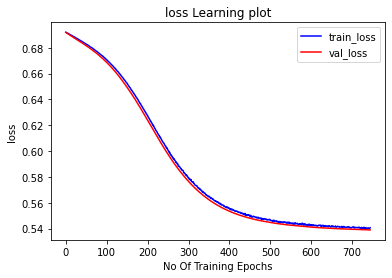

In [650]:
# Plot the loss 
plot = plot_learning(historyRank_Net.history, "loss")

 **Step 5:** Re-Ranking of the data using trained RankNet model for query 1['aspiring human resource']

In [661]:
# Input list of embeddings
input_lst = list(pd_pt_data['EmbeddingArrays'].values)
input_arr = np.array(np.stack( input_lst, axis=0 ))

# predict the score using ranknet 
pd_pt_data['ranknet_score_1'] = list(ranknet.predict(input_arr).numpy())

**Step 6:** Analyse top 20 re-ranked candidates job titles for query 1 

In [662]:
# Show top 20 results
pd_pt_data[['id', 
            'job_title', 
            'fit_1', 
            'fstext_cosine_sim_query1',
            'ranknet_score_1']].sort_values(by='ranknet_score_1', 
                                            ascending=False).head(20)

,id,job_title,fit_1,fstext_cosine_sim_query1,ranknet_score_1
73,74,Human Resources Professional,0.935650,0.935650,[0.99805814]
2,3,Aspiring Human Resources Professional,1.000000,0.982012,[0.9973334]
45,46,Aspiring Human Resources Professional,0.982012,0.982012,[0.9973334]
20,21,Aspiring Human Resources Professional,1.000000,0.982012,[0.9973334]
96,97,Aspiring Human Resources Professional,0.982012,0.982012,[0.9973334]
16,17,Aspiring Human Resources Professional,1.000000,0.982012,[0.9973334]
57,58,Aspiring Human Resources Professional,0.982012,0.982012,[0.9973334]
32,33,Aspiring Human Resources Professional,0.982012,0.982012,[0.9973334]
48,49,Aspiring Human Resources Specialist,0.969659,0.969659,[0.99676776]
59,60,Aspiring Human Resources Specialist,0.969659,0.969659,[0.99676776]


After analysing the top results returned we see the scored for id's 3,17,21,24,6 has significantly improved after starring. Our model has adapted to input and re-ranked the job titles.

**Step 6.** Preparing input for custom RankNet NN for Query 2<br>

- Generate random sample rows for input pair using sample method with replacement

In [663]:
sample_size = 125
# fetch the random input rows for input
random_row_1 = pd_pt_data.sample(n=sample_size, replace=True)
random_row_2 = pd_pt_data.sample(n=sample_size, replace=True)

X_1_2 = random_row_1['EmbeddingArrays'].values
X_2_2 = random_row_2['EmbeddingArrays'].values
Y_1_2 = random_row_1['fit_2'].values
Y_2_2 = random_row_2['fit_2'].values

 -  From random rows selected generate combinations from index

In [664]:
# Generate combinations
lst_combinations_2 = list(combinations(range(sample_size), 2))
sample_pair_2 = int(len(lst_combinations_2)* 0.70)

 - From index combinations generated randomly select 70% of the combinations

In [665]:
#select samples randomly
random_pairs_2 = [ random.randrange(len(lst_combinations_2)) for i in range(sample_pair_2)]

 - Using index of randomly selected lst_combinations index, generate input and output in format required by RankNet NN

In [666]:
# Let's create empty lists for storing pairs
X_i_2 = []
X_j_2 = []
output_ij_2 = []
pair_id_2 = []

# step 1 generate random pairs of documents 
for idx in range(0,sample_pair_2):
    # Store the pair Id's
    pair_values = lst_combinations_2[random_pairs_2[idx] ]
    pair_id_2.append(pair_values)

    # fetch the input indexes
    i, j = pair_values

    # append in Xi and Xj
    X_i_2.append(X_1_2[i])
    X_j_2.append(X_2_2[j])

    # Check the scores 
    if Y_1_2[i] == Y_2_2[j]:
        _result_ij = 0.5
    elif Y_1_2[i] > Y_2_2[j]:
        _result_ij = 1.0
    else:
        _result_ij = 0.0

    output_ij_2.append(_result_ij)

 - Generate train and validation input and output list developed in previous step

In [667]:
# Convert list into arrays
X_i_2 = np.array(X_i_2)
X_j_2 = np.array(X_j_2)
output_ij_2 = np.array(output_ij_2)
pair_id_2 = np.array(pair_id_2)

# Perform Test Train split to get validation data 
xi_train_2, xi_val_2, xj_train_2, xj_val_2, pij_train_2, pij_val_2, pair_id_train_2, pair_id_val_2 = train_test_split(
    X_i_2, X_j_2, output_ij_2, pair_id_2, test_size=0.2)

 - Train the Rank_Net() model for query 2

In [345]:
# Define the model and compile
ranknet_2 = Rank_Net()
ranknet_2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001), loss='binary_crossentropy')

# Train the model
historyRank_Net_2 = ranknet_2.fit([xi_train_2, xj_train_2], pij_train_2, epochs=2000, 
                      validation_data=([xi_val_2, xj_val_2], pij_val_2),
                              callbacks =[callback])

Epoch 1/2000
136/136 [==============================] - 2s 9ms/step - loss: 0.6944 - val_loss: 0.6942
Epoch 2/2000
136/136 [==============================] - 1s 8ms/step - loss: 0.6942 - val_loss: 0.6940
Epoch 3/2000
136/136 [==============================] - 1s 9ms/step - loss: 0.6940 - val_loss: 0.6939
Epoch 4/2000
136/136 [==============================] - 1s 8ms/step - loss: 0.6939 - val_loss: 0.6937
Epoch 5/2000
136/136 [==============================] - 1s 8ms/step - loss: 0.6937 - val_loss: 0.6936
Epoch 6/2000
136/136 [==============================] - 1s 9ms/step - loss: 0.6936 - val_loss: 0.6934
Epoch 7/2000
136/136 [==============================] - 1s 9ms/step - loss: 0.6935 - val_loss: 0.6933
Epoch 8/2000
136/136 [==============================] - 1s 9ms/step - loss: 0.6934 - val_loss: 0.6931
Epoch 9/2000
136/136 [==============================] - 1s 9ms/step - loss: 0.6932 - val_loss: 0.6930
Epoch 10/2000
136/136 [==============================] - 1s 8ms/step - loss: 0.693

136/136 [==============================] - 1s 8ms/step - loss: 0.6833 - val_loss: 0.6829
Epoch 81/2000
136/136 [==============================] - 1s 8ms/step - loss: 0.6833 - val_loss: 0.6827
Epoch 82/2000
136/136 [==============================] - 1s 8ms/step - loss: 0.6830 - val_loss: 0.6825
Epoch 83/2000
136/136 [==============================] - 1s 8ms/step - loss: 0.6829 - val_loss: 0.6824
Epoch 84/2000
136/136 [==============================] - 1s 8ms/step - loss: 0.6828 - val_loss: 0.6822
Epoch 85/2000
136/136 [==============================] - 1s 8ms/step - loss: 0.6825 - val_loss: 0.6820
Epoch 86/2000
136/136 [==============================] - 1s 9ms/step - loss: 0.6824 - val_loss: 0.6819
Epoch 87/2000
136/136 [==============================] - 1s 8ms/step - loss: 0.6822 - val_loss: 0.6817
Epoch 88/2000
136/136 [==============================] - 1s 9ms/step - loss: 0.6820 - val_loss: 0.6815
Epoch 89/2000
136/136 [==============================] - 1s 9ms/step - loss: 0.6819 - v

136/136 [==============================] - 1s 8ms/step - loss: 0.6629 - val_loss: 0.6632
Epoch 160/2000
136/136 [==============================] - 1s 8ms/step - loss: 0.6625 - val_loss: 0.6628
Epoch 161/2000
136/136 [==============================] - 1s 8ms/step - loss: 0.6622 - val_loss: 0.6625
Epoch 162/2000
136/136 [==============================] - 1s 8ms/step - loss: 0.6616 - val_loss: 0.6621
Epoch 163/2000
136/136 [==============================] - 1s 8ms/step - loss: 0.6614 - val_loss: 0.6617
Epoch 164/2000
136/136 [==============================] - 1s 8ms/step - loss: 0.6611 - val_loss: 0.6613
Epoch 165/2000
136/136 [==============================] - 1s 8ms/step - loss: 0.6605 - val_loss: 0.6609
Epoch 166/2000
136/136 [==============================] - 1s 8ms/step - loss: 0.6603 - val_loss: 0.6605
Epoch 167/2000
136/136 [==============================] - 1s 8ms/step - loss: 0.6596 - val_loss: 0.6601
Epoch 168/2000
136/136 [==============================] - 1s 8ms/step - loss: 0

Epoch 238/2000
136/136 [==============================] - 1s 8ms/step - loss: 0.6152 - val_loss: 0.6180
Epoch 239/2000
136/136 [==============================] - 1s 8ms/step - loss: 0.6142 - val_loss: 0.6173
Epoch 240/2000
136/136 [==============================] - 1s 8ms/step - loss: 0.6138 - val_loss: 0.6166
Epoch 241/2000
136/136 [==============================] - 1s 8ms/step - loss: 0.6124 - val_loss: 0.6158
Epoch 242/2000
136/136 [==============================] - 1s 8ms/step - loss: 0.6119 - val_loss: 0.6151
Epoch 243/2000
136/136 [==============================] - 1s 8ms/step - loss: 0.6111 - val_loss: 0.6143
Epoch 244/2000
136/136 [==============================] - 1s 8ms/step - loss: 0.6106 - val_loss: 0.6136
Epoch 245/2000
136/136 [==============================] - 1s 8ms/step - loss: 0.6094 - val_loss: 0.6128
Epoch 246/2000
136/136 [==============================] - 1s 8ms/step - loss: 0.6083 - val_loss: 0.6120
Epoch 247/2000
136/136 [==============================] - 1s 8ms

136/136 [==============================] - 1s 10ms/step - loss: 0.5605 - val_loss: 0.5664
Epoch 317/2000
136/136 [==============================] - 1s 9ms/step - loss: 0.5602 - val_loss: 0.5659
Epoch 318/2000
136/136 [==============================] - 1s 9ms/step - loss: 0.5600 - val_loss: 0.5655
Epoch 319/2000
136/136 [==============================] - 1s 9ms/step - loss: 0.5587 - val_loss: 0.5650
Epoch 320/2000
136/136 [==============================] - 1s 9ms/step - loss: 0.5577 - val_loss: 0.5645
Epoch 321/2000
136/136 [==============================] - 1s 9ms/step - loss: 0.5575 - val_loss: 0.5641
Epoch 322/2000
136/136 [==============================] - 1s 8ms/step - loss: 0.5572 - val_loss: 0.5637
Epoch 323/2000
136/136 [==============================] - 1s 8ms/step - loss: 0.5572 - val_loss: 0.5632
Epoch 324/2000
136/136 [==============================] - 1s 8ms/step - loss: 0.5560 - val_loss: 0.5628
Epoch 325/2000
136/136 [==============================] - 1s 8ms/step - loss: 

Epoch 395/2000
136/136 [==============================] - 1s 8ms/step - loss: 0.5361 - val_loss: 0.5435
Epoch 396/2000
136/136 [==============================] - 1s 8ms/step - loss: 0.5362 - val_loss: 0.5434
Epoch 397/2000
136/136 [==============================] - 1s 8ms/step - loss: 0.5358 - val_loss: 0.5432
Epoch 398/2000
136/136 [==============================] - 1s 8ms/step - loss: 0.5360 - val_loss: 0.5430
Epoch 399/2000
136/136 [==============================] - 1s 11ms/step - loss: 0.5352 - val_loss: 0.5429
Epoch 400/2000
136/136 [==============================] - 1s 8ms/step - loss: 0.5355 - val_loss: 0.5427
Epoch 401/2000
136/136 [==============================] - 1s 7ms/step - loss: 0.5353 - val_loss: 0.5426
Epoch 402/2000
136/136 [==============================] - 1s 7ms/step - loss: 0.5351 - val_loss: 0.5424
Epoch 403/2000
136/136 [==============================] - 1s 7ms/step - loss: 0.5348 - val_loss: 0.5423
Epoch 404/2000
136/136 [==============================] - 1s 7m

136/136 [==============================] - 2s 12ms/step - loss: 0.5283 - val_loss: 0.5358
Epoch 474/2000
136/136 [==============================] - 2s 15ms/step - loss: 0.5280 - val_loss: 0.5357
Epoch 475/2000
136/136 [==============================] - 2s 17ms/step - loss: 0.5281 - val_loss: 0.5357
Epoch 476/2000
136/136 [==============================] - 2s 15ms/step - loss: 0.5276 - val_loss: 0.5356
Epoch 477/2000
136/136 [==============================] - 1s 11ms/step - loss: 0.5285 - val_loss: 0.5356
Epoch 478/2000
136/136 [==============================] - 1s 10ms/step - loss: 0.5276 - val_loss: 0.5355
Epoch 479/2000
136/136 [==============================] - 1s 9ms/step - loss: 0.5275 - val_loss: 0.5354
Epoch 480/2000
136/136 [==============================] - 1s 10ms/step - loss: 0.5281 - val_loss: 0.5354
Epoch 481/2000
136/136 [==============================] - 1s 8ms/step - loss: 0.5276 - val_loss: 0.5353
Epoch 482/2000
136/136 [==============================] - 1s 8ms/step - 

136/136 [==============================] - 1s 8ms/step - loss: 0.5235 - val_loss: 0.5327
Epoch 552/2000
136/136 [==============================] - 1s 9ms/step - loss: 0.5248 - val_loss: 0.5327
Epoch 553/2000
136/136 [==============================] - 1s 11ms/step - loss: 0.5243 - val_loss: 0.5327
Epoch 554/2000
136/136 [==============================] - 2s 12ms/step - loss: 0.5242 - val_loss: 0.5326
Epoch 555/2000
136/136 [==============================] - 2s 11ms/step - loss: 0.5240 - val_loss: 0.5326
Epoch 556/2000
136/136 [==============================] - 1s 10ms/step - loss: 0.5241 - val_loss: 0.5326
Epoch 557/2000
136/136 [==============================] - 1s 10ms/step - loss: 0.5243 - val_loss: 0.5326
Epoch 558/2000
136/136 [==============================] - 1s 10ms/step - loss: 0.5237 - val_loss: 0.5325
Epoch 559/2000
136/136 [==============================] - 1s 10ms/step - loss: 0.5237 - val_loss: 0.5325
Epoch 560/2000
136/136 [==============================] - 1s 9ms/step - 

136/136 [==============================] - 1s 9ms/step - loss: 0.5217 - val_loss: 0.5314
Epoch 630/2000
136/136 [==============================] - 1s 8ms/step - loss: 0.5226 - val_loss: 0.5314
Epoch 631/2000
136/136 [==============================] - 1s 8ms/step - loss: 0.5218 - val_loss: 0.5314
Epoch 632/2000
136/136 [==============================] - 1s 8ms/step - loss: 0.5222 - val_loss: 0.5314
Epoch 633/2000
136/136 [==============================] - 1s 9ms/step - loss: 0.5220 - val_loss: 0.5313
Epoch 634/2000
136/136 [==============================] - 1s 9ms/step - loss: 0.5222 - val_loss: 0.5314
Epoch 635/2000
136/136 [==============================] - 1s 9ms/step - loss: 0.5220 - val_loss: 0.5314
Epoch 636/2000
136/136 [==============================] - 1s 9ms/step - loss: 0.5218 - val_loss: 0.5313
Epoch 637/2000
136/136 [==============================] - 1s 9ms/step - loss: 0.5221 - val_loss: 0.5313
Epoch 638/2000
136/136 [==============================] - 1s 9ms/step - loss: 0

 - Visualise the model learning

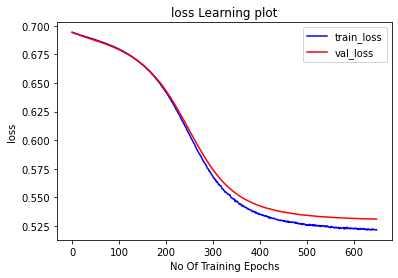

In [668]:
# Predict and add score
plot = plot_learning(historyRank_Net_2.history, "loss")

 **Step 7:** Re-Ranking of the data using trained RankNet model for query 2['seeking human resource']

In [669]:
pd_pt_data['ranknet_score_2'] = list(ranknet_2.predict(input_arr).numpy())

**Step 8:** Analyse top 20 re-ranked candidates job titles for query 2

In [670]:
pd_pt_data[['id', 'job_title', 
            'fit_2', 'ranknet_score_2', 
            'fstext_cosine_sim_query2']].sort_values(by='fit_2', 
                                                     ascending=False).head(20)

,id,job_title,fit_2,ranknet_score_2,fstext_cosine_sim_query2
0,1,2019 C.T. Bauer College of Business Graduate (...,1.000000,[0.9896464],0.435376
7,8,HR Senior Specialist,1.000000,[0.95282793],0.235487
14,15,2019 C.T. Bauer College of Business Graduate (...,1.000000,[0.9896464],0.435376
13,14,2019 C.T. Bauer College of Business Graduate (...,1.000000,[0.9896464],0.435376
25,26,HR Senior Specialist,1.000000,[0.95282793],0.235487
18,19,2019 C.T. Bauer College of Business Graduate (...,1.000000,[0.9896464],0.435376
9,10,Seeking Human Resources HRIS and Generalist Po...,1.000000,[0.9822352],0.730645
29,30,Seeking Human Resources Opportunities,0.976236,[0.9964472],0.976236
27,28,Seeking Human Resources Opportunities,0.976236,[0.9964472],0.976236
98,99,Seeking Human Resources Position,0.963665,[0.9955863],0.963665


The model seems to perform good, we can see the canditates starred by user are now ranked higher. 

<html>
    <div align="left"><img src="https://www.microsoft.com/en-us/research/uploads/prod/2020/09/GIF-_Azure_InnerEyeBlog.gif" width="200" height="200" align="left">
    </div>
     <div >
         <h3><br><br>Results </h3>
    </div>
</html>

The neural networks perform better as the size of input increase. The re-ranker created is able to perform a good job. <br>
<h4> For query 1 'aspiring human resource' top results in data are </h4>

In [674]:
pd_pt_data[['id', 
            'job_title', 
            'location', 
            'ranknet_score_1']].sort_values(by='ranknet_score_1', 
                                            ascending=False).head(20)

,id,job_title,location,ranknet_score_1
73,74,Human Resources Professional,greater boston area,[0.99805814]
2,3,Aspiring Human Resources Professional,raleigh durham north carolina area,[0.9973334]
45,46,Aspiring Human Resources Professional,raleigh durham north carolina area,[0.9973334]
20,21,Aspiring Human Resources Professional,raleigh durham north carolina area,[0.9973334]
96,97,Aspiring Human Resources Professional,kokomo indiana area,[0.9973334]
16,17,Aspiring Human Resources Professional,raleigh durham north carolina area,[0.9973334]
57,58,Aspiring Human Resources Professional,raleigh durham north carolina area,[0.9973334]
32,33,Aspiring Human Resources Professional,raleigh durham north carolina area,[0.9973334]
48,49,Aspiring Human Resources Specialist,greater new york city area,[0.99676776]
59,60,Aspiring Human Resources Specialist,greater new york city area,[0.99676776]


<h4> For query 2 'seeking human resource' top results in data are </h4>

In [675]:
pd_pt_data[['id', 
            'job_title', 
            'location', 
            'ranknet_score_2']].sort_values(by='ranknet_score_2', 
                                            ascending=False).head(20)

,id,job_title,location,ranknet_score_2
73,74,Human Resources Professional,greater boston area,[0.99782485]
29,30,Seeking Human Resources Opportunities,chicago illinois,[0.9964472]
27,28,Seeking Human Resources Opportunities,chicago illinois,[0.9964472]
57,58,Aspiring Human Resources Professional,raleigh durham north carolina area,[0.9961492]
2,3,Aspiring Human Resources Professional,raleigh durham north carolina area,[0.9961492]
45,46,Aspiring Human Resources Professional,raleigh durham north carolina area,[0.9961492]
16,17,Aspiring Human Resources Professional,raleigh durham north carolina area,[0.9961492]
96,97,Aspiring Human Resources Professional,kokomo indiana area,[0.9961492]
32,33,Aspiring Human Resources Professional,raleigh durham north carolina area,[0.9961492]
20,21,Aspiring Human Resources Professional,raleigh durham north carolina area,[0.9961492]
